# ENVIRONMENT

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LassoCV
from sklearn import preprocessing

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("precision", 3)

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 150

sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings("ignore")
RANDOM_STATE = 1


In [14]:
df = pd.read_csv("./src/ChurnData/churn_clean.csv"
)


In [15]:
df.shape


(10000, 50)

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [17]:
df.describe()


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,49153.32,38.76,-90.78,9756.56,2.09,53.08,39806.93,10.00,12.02,0.99,0.40,34.53,172.62,3392.34,3.49,3.51,3.49,3.50,3.49,3.50,3.51,3.50
std,2886.90,27532.20,5.44,15.16,14432.70,2.15,20.70,28199.92,2.98,3.03,0.99,0.64,26.44,42.94,2185.29,1.04,1.03,1.03,1.03,1.02,1.03,1.03,1.03
min,1.00,601.00,17.97,-171.69,0.00,0.00,18.00,348.67,0.10,1.00,0.00,0.00,1.00,79.98,155.51,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2500.75,26292.50,35.34,-97.08,738.00,0.00,35.00,19224.72,8.02,10.00,0.00,0.00,7.92,139.98,1236.47,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,5000.50,48869.50,39.40,-87.92,2910.50,1.00,53.00,33170.60,10.02,12.00,1.00,0.00,35.43,167.48,3279.54,3.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00
75%,7500.25,71866.50,42.11,-80.09,13168.00,3.00,71.00,53246.17,11.97,14.00,2.00,1.00,61.48,200.73,5586.14,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
max,10000.00,99929.00,70.64,-65.67,111850.00,10.00,89.00,258900.70,21.21,23.00,7.00,6.00,72.00,290.16,7158.98,7.00,7.00,8.00,7.00,7.00,8.00,7.00,8.00


In [18]:
df.head()


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25,-133.38,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.98,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.80,172.46,904.54,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.33,-84.24,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.70,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.16,242.63,800.98,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.36,-123.25,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.75,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.75,159.95,2054.71,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.97,-117.25,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.91,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.09,119.96,2164.58,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38,-95.81,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.15,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.67,149.95,271.49,4,4,4,3,4,4,4,5


# Part I: Research Question 
---

## A.  Describe the purpose of this data mining report by doing the following:



### 1. Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods: k-nearest neighbor (KNN), Naive Bayes.
*The submission proposes 1 question that is relevant to a real-world organizational situation, and the proposal includes 1 of the given classification methods.*

- Can we accurately predict if a customer will churn
- Can we accurately predict which customers are at high risk of churn

### 2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.*

- Using a Classification Model
- The telecommunications industry is a highly competitive market that sees high annual turnover rates.
- Reduce operating cost by improving customer retention — it costs 10 times more to acquire a new customer than to retain an existing one
- identify high risk customers and offer them incentives or survey's to see how the company can retain/regain their loyalty
- For many providers, retaining highly profitable customers is the number one business goal.
- predict which customers are at high risk of churn To reduce customer churn 

# Part II: Method Justification

---

## B.  Explain the reasons for your chosen classification method from part A1 by doing the following:



### 1.  Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.
*The submission logically explains how the chosen classification method analyzes the selected data set and includes accurate expected outcomes.*

### 2.  Summarize one assumption of the chosen classification method.
*The submission adequately summarizes 1 assumption of the chosen classification method.*

### 3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.
*The submission lists the packages or libraries chosen for Python or R and justifies how each item on the list supports the analysis.*

# Part III: Data Preparation


---

## C.  Perform data preparation for the chosen data set by doing the following:

### 1.  Describe one data preprocessing goal relevant to the classification method from part A1.
*The submission describes 1 data preprocessing goal that is relevant to the classification method from part A1.*


### 2.  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.
*The submission identifies the data set variables used to perform the analysis for the classification question from part A1, and the submission accurately classifies each variable as continuous or categorical.*


### 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.
*The submission accurately explains each step used to prepare the data for analysis, and the submission identifies an accurate code segment for each step.*


In [ ]:
# EDA
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
from sklearn.preprocessing import scale, Imputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.model_selection import cross_val_score, train_test_split 

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

steps = [
    ('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
param_grid = {'knn__n_neighbors': np.arange(1, 9),
              'knn__weights': ['uniform', 'distance'],
              'knn__leaf_size': [30],
              'knn__n_jobs': [-1],
             }

# {'algorithm': 'auto',
#  'leaf_size': 30,
#  'metric': 'minkowski',
#  'metric_params': None,
#  'n_jobs': 1,
#  'n_neighbors': 5,
#  'p': 2,
#  'weights': 'uniform'}


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=RANDOM_STATE)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# # Predict and print the label for the new data point X_new
# new_prediction = knn.predict(X_new)
# print("Prediction: {}".format(new_prediction))

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


In [ ]:
# measure model performance

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
# visualize model accuracy of test vs training data using different n_neighbords

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### 4.  Provide a copy of the cleaned data set.
*The submission includes an accurate copy of the cleaned data set.*

# Part IV: Analysis


---

## D.  Perform the data analysis and report on the results by doing the following:



### 1.  Split the data into training and test data sets and provide the file(s).
*The submission provides reasonably proportioned training and test data sets.*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
# write test and train to sep CSVs

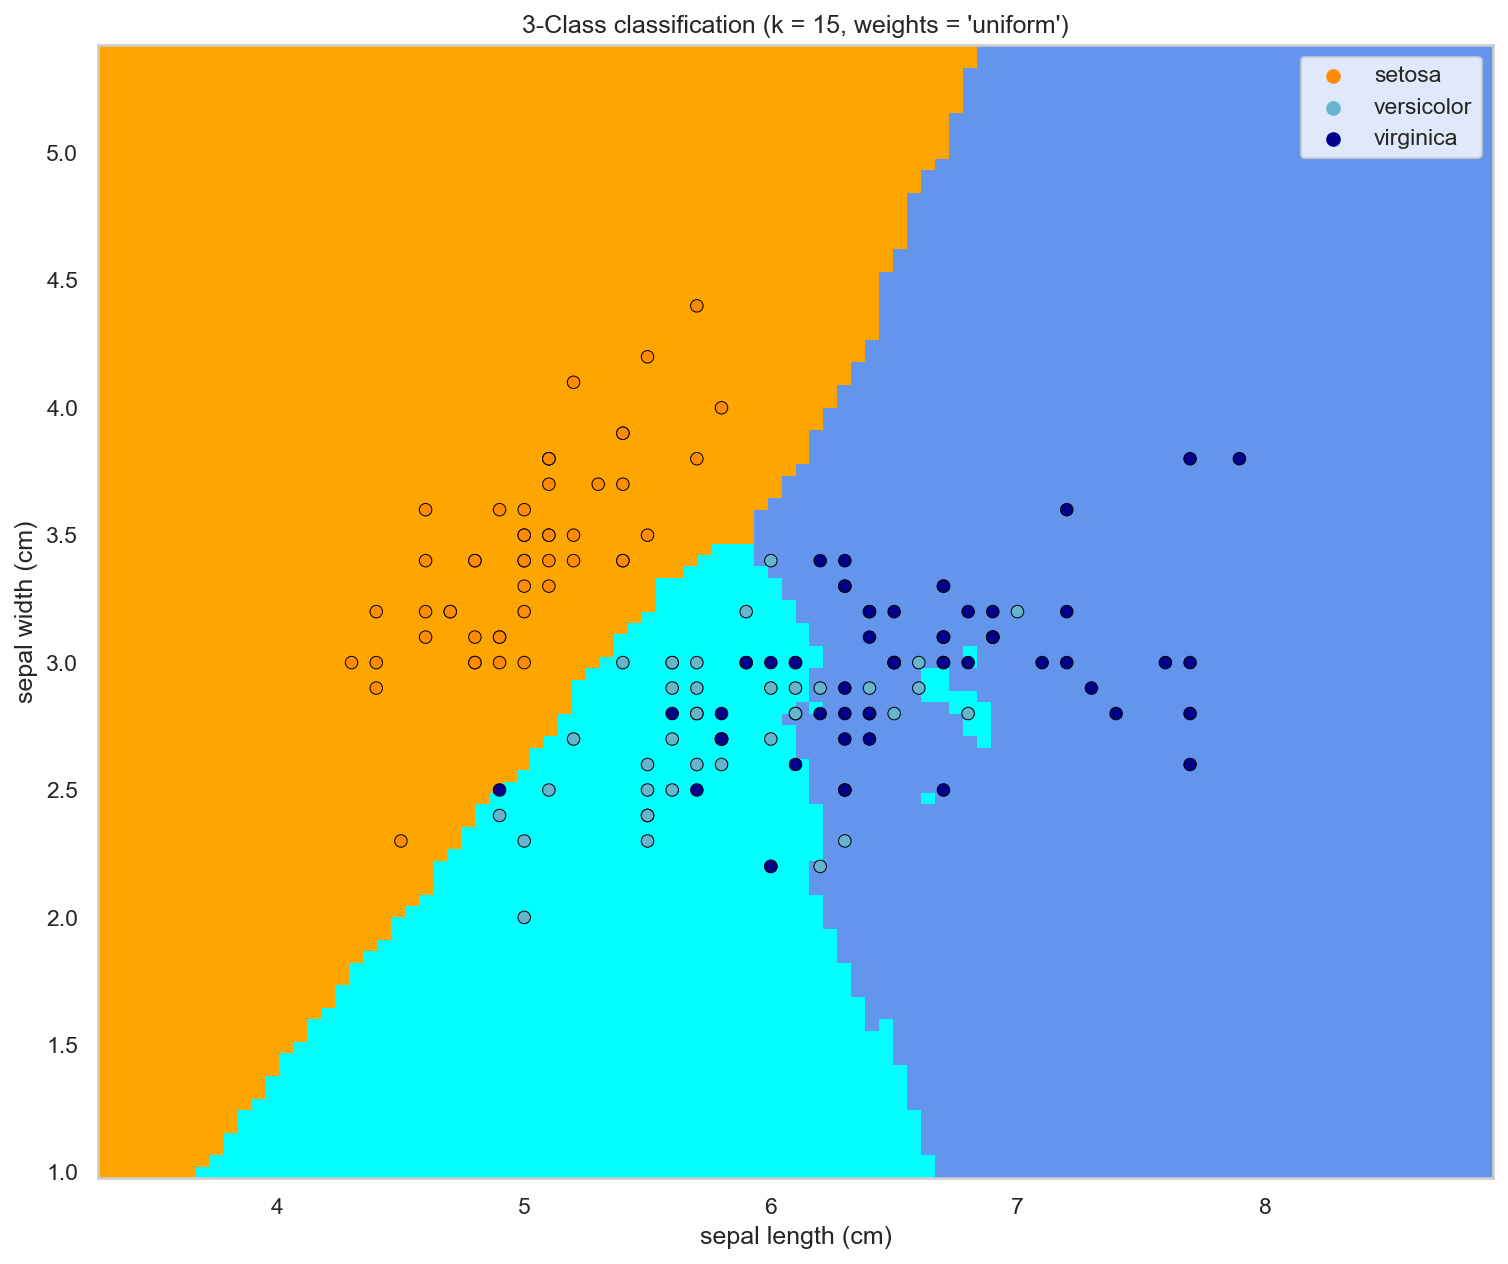

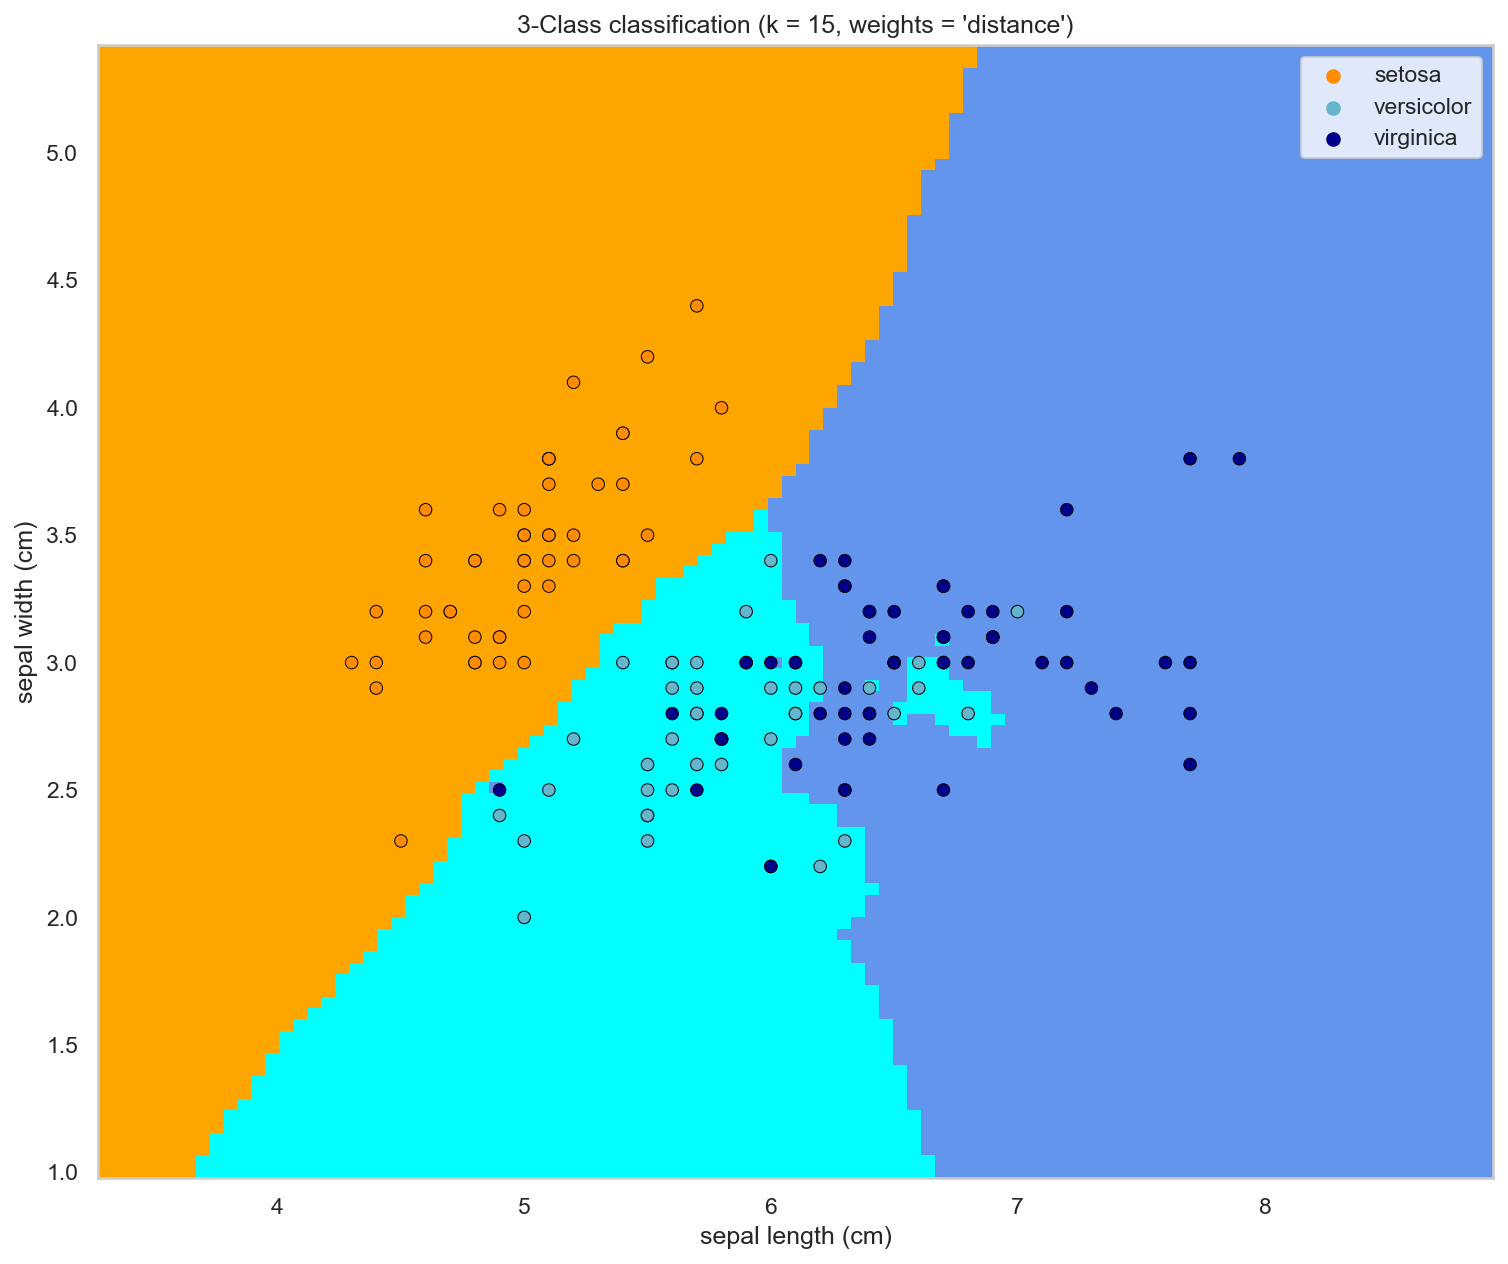

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

### 2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.
*The submission accurately describes the analysis technique used to appropriately analyze the data, and the submission includes accurate screenshots of the intermediate calculations performed.*


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

print(f'k-NN accuracy for test set {knn.score(X_test, y_test)})
      
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn.predict(X_test)
print(classification_report(y_true, y_pred))

### 3.  Provide the code used to perform the classification analysis from part D2.
*The submission provides the code used to perform the classification analysis from part D2 and the code executes without errors.*


In [ ]:
# provide baseline KNN with defaults to use for model comparison

# Part V: Data Summary and Implications
---

## E.  Summarize your data analysis by doing the following:


### 1.  Explain the accuracy and the area under the curve (AUC) of your classification model.
*The submission logically explains both the accuracy and the AUC of the classification model.*

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = cv.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

### 2.  Discuss the results and implications of your classification analysis.
*The submission adequately discusses both the results and implications of the classification analysis.*

### 3.  Discuss one limitation of your data analysis.

*The submission logically discusses 1 limitation of the data analysis with adequate detail.*

#### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.
*The submission recommends a reasonable course of action for the real-world organizational situation from part A1 based on the results and implications discussed in part E2.*

# Part VI: Demonstration
---

## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
*The submission provides a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.*

## G.  Web Sources

- https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

## H. References